In [115]:
import matplotlib.pyplot as plt
import numpy as np

In [116]:
#load  random dataset
a = np.random.multivariate_normal((1.5, 3), [[0.5, 0], [0, .05]], 30)
b = np.random.multivariate_normal((4, 1.5), [[0.5, 0], [0, .05]], 30)

In [117]:
mu_a,mu_b=a.mean(axis=0).reshape(-1,1), b.mean(axis=0).reshape(-1,1)
var_a,var_b=np.cov(a.T),np.cov(b.T)
SW=var_a+var_b
SB=(mu_a-mu_b)@((mu_a-mu_b).T)
print(SW.shape)
print(SB.shape)

(2, 2)
(2, 2)


In [118]:
SW_inv=np.linalg.inv(SW)
A=SW_inv@SB
eigen_value,eigen_vector=np.linalg.eig(A)
print(eigen_vector)
print(eigen_value)


[[-0.50935485  0.15922509]
 [-0.86055659 -0.98724231]]
[ 0.         28.54374942]


In [119]:
index = np.argmax(eigen_value)
best_eigenvector = eigen_vector[:, index]
projected_a=a@best_eigenvector
projected_b=b@best_eigenvector


In [120]:
bias = -1*best_eigenvector.T @ (mu_a - mu_b) / 2


C:\Users\NovinAT\AppData\Local\Temp\ipykernel_16960\710644437.py:10: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot([point[0], projection_point[0]], [point[1], projection_point[1]], 'k-', linestyle=':', color='blue', alpha=.7)
C:\Users\NovinAT\AppData\Local\Temp\ipykernel_16960\710644437.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([point[0], projection_point[0]], [point[1], projection_point[1]], 'k-', linestyle=':', color='blue', alpha=.7)
C:\Users\NovinAT\AppData\Local\Temp\ipykernel_16960\710644437.py:15: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot([point[0], projection_point[0]], [point[1],

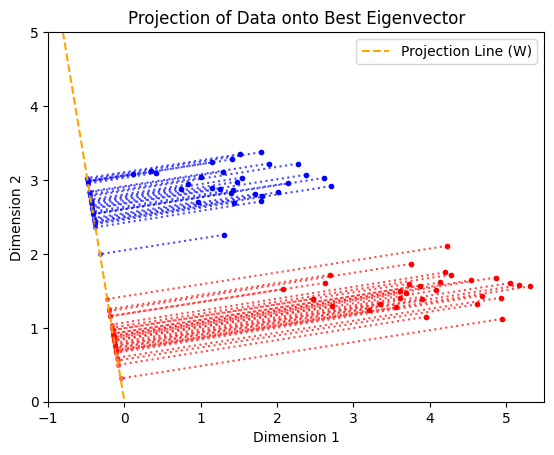

In [145]:
plt.plot(a[:,0], a[:,1], 'b.', b[:,0], b[:,1], 'r.')
plt.gca().set_xlim(-1,5.5)
plt.gca().set_ylim(0,5)
x_vals = np.array(plt.gca().get_xlim())
y_vals = (x_vals * best_eigenvector[1] / best_eigenvector[0])
plt.plot(x_vals, y_vals, '--', color='orange', label='Projection Line (W)')

for point, projection in zip(a, projected_a):
    projection_point = projection * best_eigenvector
    plt.plot([point[0], projection_point[0]], [point[1], projection_point[1]], 'k-', linestyle=':', color='blue', alpha=.7)
    plt.scatter([point[0], projection_point[0]], [point[1], projection_point[1]], color='b', alpha=.5, s=8)

for point, projection in zip(b, projected_b):
    projection_point = projection * best_eigenvector
    plt.plot([point[0], projection_point[0]], [point[1], projection_point[1]], 'k-', linestyle=':', color='red', alpha=.7)
    plt.scatter([point[0], projection_point[0]], [point[1], projection_point[1]], color='r', alpha=.5, s=8)

# plt.axvline(x=0, color='green', linestyle='--')
# plt.axhline(y=0, color='green', linestyle='--')
plt.title('Projection of Data onto Best Eigenvector')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()